In [1]:
from Superior import Superior
from Reality import Reality
from Individual import Individual
import matplotlib.pyplot as plt
import numpy as np
import time

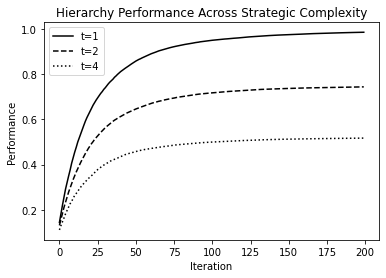

In [2]:
# Comparison between Overall Payoff, Policy Payoff, and Belief Payoff
m = 24
s = 3
t_list = [1, 2, 4]
n = 100
data_across_para = []
version = "Weighted"
repetition_round = 100
search_round = 200
t0 = time.time()
for t in t_list:
    data_across_repetition = []
    for _ in range(repetition_round):
        reality = Reality(m=m, s=s, t=t, version=version)
        superior = Superior(m=m, s=s, t=t, n=n, reality=reality, authority=1.0)
        data_across_time = []
        for _ in range(search_round):
            superior.weighted_local_search()
            payoff_list = [individual.payoff for individual in superior.individuals]
            data_across_time.append(sum(payoff_list) / len(payoff_list))
        data_across_repetition.append(data_across_time)
    result_1 = []
    for i in range(search_round):
        temp = [payoff_list[i] for payoff_list in data_across_repetition]
        result_1.append(sum(temp) / len(temp))
    data_across_para.append(result_1)

x = range(search_round)
plt.plot(x, data_across_para[0], "k-", label="t=1")
plt.plot(x, data_across_para[1], "k--", label="t=2")
plt.plot(x, data_across_para[2], "k:", label="t=4")
# plt.savefig("search.jpg")
plt.title('Hierarchy Performance Across Strategic Complexity')
plt.xlabel('Iteration')
plt.ylabel('Performance')
plt.legend()
plt.show()

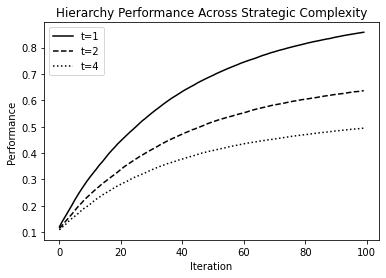

In [3]:
# Comparison between Overall Payoff, Policy Payoff, and Belief Payoff
m = 48
s = 3
t_list = [1, 2, 4]
n = 100
data_across_para = []
version = "Weighted"
repetition_round = 100
search_round = 100
for t in t_list:
    data_across_repetition = []
    for _ in range(repetition_round):
        reality = Reality(m=m, s=s, t=t, version=version)
        superior = Superior(m=m, s=s, t=t, n=n, reality=reality, authority=1.0)
        data_across_time = []
        for _ in range(search_round):
            superior.weighted_local_search()
            payoff_list = [individual.payoff for individual in superior.individuals]
            data_across_time.append(sum(payoff_list) / len(payoff_list))
        data_across_repetition.append(data_across_time)
    result_1 = []
    for i in range(search_round):
        temp = [payoff_list[i] for payoff_list in data_across_repetition]
        result_1.append(sum(temp) / len(temp))
    data_across_para.append(result_1)


x = range(search_round)
plt.plot(x, data_across_para[0], "k-", label="t=1")
plt.plot(x, data_across_para[1], "k--", label="t=2")
plt.plot(x, data_across_para[2], "k:", label="t=4")
# plt.savefig("search.jpg")
plt.title('Hierarchy Performance Across Strategic Complexity')
plt.xlabel('Iteration')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [3]:
# DAOs
m = 24
s_list = [1, 3, 5]
t = 1
n = 100
data_across_para = []
version = "Weighted"
repetition_round = 100
search_round = 200
for s in s_list:
    data_across_repetition = []
    for _ in range(repetition_round):
        reality = Reality(m=m, s=s, t=t, version=version)
        superior = Superior(m=m, s=s, t=t, n=n, reality=reality, authority=1.0)
        data_across_time = []
        consensus = [0] * (m // s)
        for _ in range(search_round):
            for individual in superior.individuals:
                next_index = np.random.choice(len(consensus))
                next_policy = consensus[next_index]
                individual.constrained_local_search_under_consensus(focal_policy=next_policy, focal_policy_index=next_index)
            consensus = []
            for i in range(m//s):
                temp = sum(individual.policy[i] * individual.payoff for individual in superior.individuals)
                if temp < 0:
                    consensus.append(-1)
                elif temp > 0:
                    consensus.append(1)
                else:
                    consensus.append(0)
            payoff_list = [individual.payoff for individual in superior.individuals]
            data_across_time.append(sum(payoff_list) / len(payoff_list))
        data_across_repetition.append(data_across_time)
    result_1 = []
    for i in range(search_round):
        temp = [payoff_list[i] for payoff_list in data_across_repetition]
        result_1.append(sum(temp) / len(temp))
    data_across_para.append(result_1)

x = range(search_round)
plt.plot(x, data_across_para[0], "k-", label="t=1")
plt.plot(x, data_across_para[1], "k--", label="t=2")
plt.plot(x, data_across_para[2], "k:", label="t=4")
# plt.savefig("search.jpg")
plt.title('DAO Performance Across Strategic Complexity')
plt.xlabel('Iteration')
plt.ylabel('Performance')
plt.legend()
plt.show()

ValueError: m must be a multiple of (s * t)

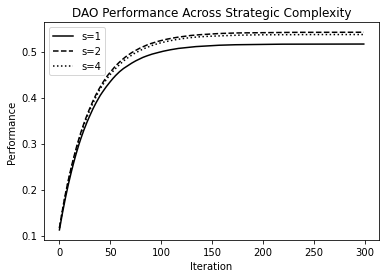

In [5]:
# Comparison between Overall Payoff, Policy Payoff, and Belief Payoff
m = 24
t = 1
s_list = [1, 3, 5]
n = 300
data_across_para = []
version = "Weighted"
repetition_round = 100
search_round = 300
for t in t_list:
    data_across_repetition = []
    for _ in range(repetition_round):
        reality = Reality(m=m, s=s, t=t, version=version)
        superior = Superior(m=m, s=s, t=t, n=n, reality=reality, authority=1.0)
        data_across_time = []
        consensus = [0] * (m // s)
        for _ in range(search_round):
            for individual in superior.individuals:
                next_index = np.random.choice(len(consensus))
                next_policy = consensus[next_index]
                individual.constrained_local_search_under_consensus(focal_policy=next_policy, focal_policy_index=next_index)
            consensus = []
            for i in range(m//s):
                temp = sum(individual.policy[i] for individual in superior.individuals)
                if temp < 0:
                    consensus.append(-1)
                elif temp > 0:
                    consensus.append(1)
                else:
                    consensus.append(0)
            payoff_list = [individual.payoff for individual in superior.individuals]
            data_across_time.append(sum(payoff_list) / len(payoff_list))
        data_across_repetition.append(data_across_time)
    result_1 = []
    for i in range(search_round):
        temp = [payoff_list[i] for payoff_list in data_across_repetition]
        result_1.append(sum(temp) / len(temp))
    data_across_para.append(result_1)

x = range(search_round)
plt.plot(x, data_across_para[0], "k-", label="s=1")
plt.plot(x, data_across_para[1], "k--", label="s=2")
plt.plot(x, data_across_para[2], "k:", label="s=4")
# plt.savefig("search.jpg")
plt.title('DAO Performance Across Strategic Complexity')
plt.xlabel('Iteration')
plt.ylabel('Performance')
plt.legend()
plt.show()